In [1]:
import scipy
import numpy as np
from optimization import barrier_method_lasso
from oracles import lasso_duality_gap
from oracles import grad_finite_diff, hess_finite_diff
from oracles import LASSOOptOracle
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file

# Определение чувствительности метода к параметрам $\gamma$ и $\epsilon_{inner}$

In [2]:
X, y = load_svmlight_file('w8a.txt')

In [3]:
np.random.seed(10)
n = X.shape[1]
x_0 = np.random.uniform(0,1,n)
u_0 = np.ones(n)

In [4]:
gammas = [2, 10, 100, 1000]
def gamma_dependence(gammas, mode='n_iter'):
    for gamma in gammas:
        trace = barrier_method_lasso(X, y, 1/X.shape[0], x_0, u_0, lasso_duality_gap=lasso_duality_gap, trace=True, gamma=gamma)
        gap = trace[2]['duality_gap']
        x = list(range(len(gap))) if mode=='n_iter' else trace[2]['time']
        plt.semilogy(x, gap, label=f'$\gamma$ = {gamma}')
    title = 'Чувствительность метода к $\gamma$'
    plt.ylabel('зазор двойственности')
    plt.xlabel('число итераций' if mode == 'n_iter' else 'время работы, c')
    plt.title(title)
    plt.grid()
    plt.legend()

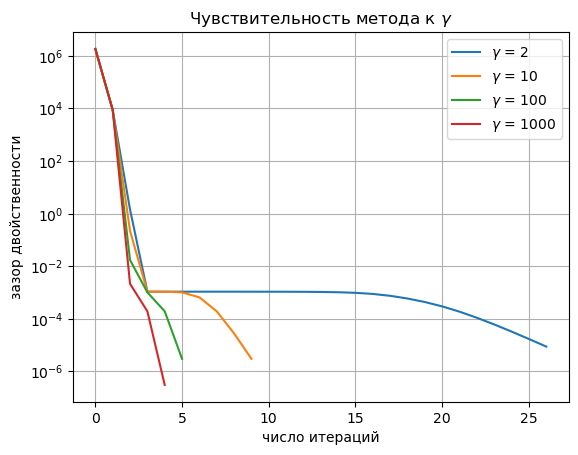

In [5]:
gamma_dependence(gammas, mode='n_iter')
plt.show()

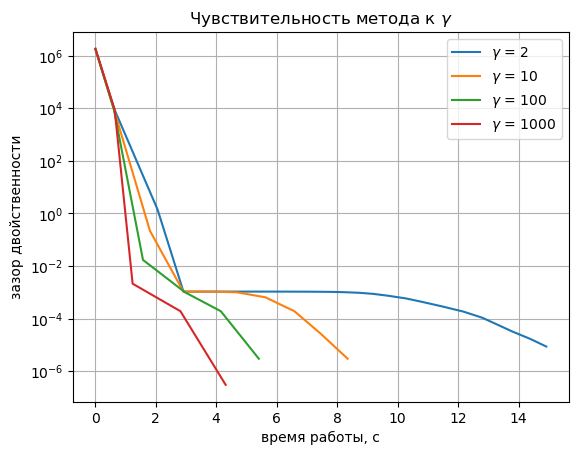

In [6]:
gamma_dependence(gammas, mode='time')
plt.show()

In [7]:
epsilons=[1e-8, 1e-7, 1e-6, 1e-5]
def epsilon_dependence(epsilons, mode='n_iter'):
    for epsilon in epsilons:
        trace = barrier_method_lasso(X, y, 1/X.shape[0], x_0, u_0, lasso_duality_gap=lasso_duality_gap, trace=True, gamma=10, tolerance_inner=epsilon)
        gap = trace[2]['duality_gap']
        x = list(range(len(gap))) if mode=='n_iter' else trace[2]['time']
        plt.semilogy(x, gap, label=f'$\epsilon$ = {epsilon}')
    title = 'Чувствительность метода к $\epsilon$'
    plt.ylabel('зазор двойственности')
    plt.xlabel('число итераций' if mode == 'n_iter' else 'время работы, c')
    plt.title(title)
    plt.grid()
    plt.legend()

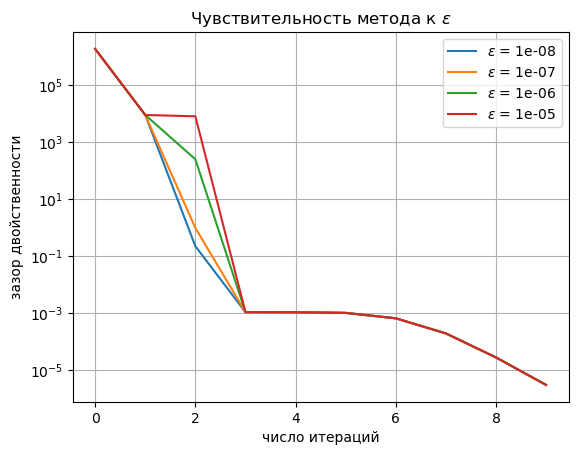

In [8]:
epsilon_dependence(epsilons, mode='n_iter')
plt.show()

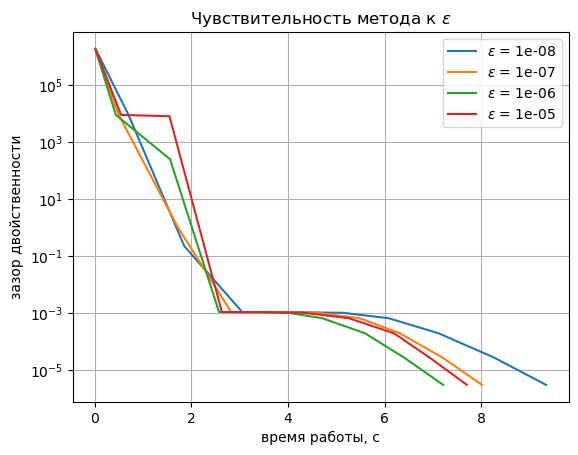

In [9]:
epsilon_dependence(epsilons, mode='time')
plt.show()

# Исследование поведения метода в зависимости от n, m, $\lambda$

In [10]:
lambdas = [1/X.shape[0], 0.01, 0.1]
def lambda_dependence(lambdas, mode='n_iter'):
    for l in lambdas:
        trace = barrier_method_lasso(X, y, l, x_0, u_0, lasso_duality_gap=lasso_duality_gap, trace=True, gamma=10)
        gap = trace[2]['duality_gap']
        x = list(range(len(gap))) if mode=='n_iter' else trace[2]['time']
        plt.semilogy(x, gap, label=f'$\lambda$ = {l}')
    title = 'Поведение метода в зависимости от $\lambda$'
    plt.ylabel('зазор двойственности')
    plt.xlabel('число итераций' if mode == 'n_iter' else 'время работы, c')
    plt.title(title)
    plt.grid()
    plt.legend()

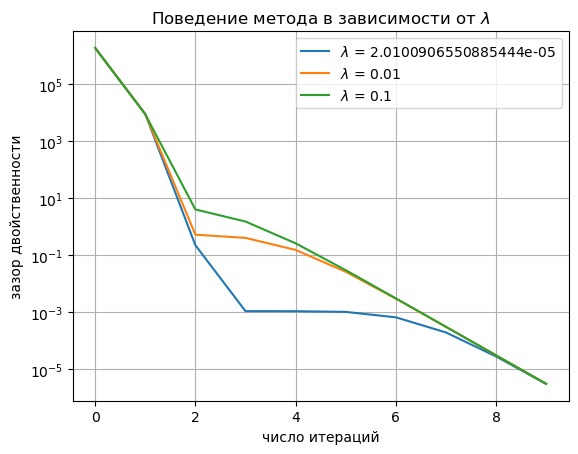

In [11]:
lambda_dependence(lambdas, mode='n_iter')
plt.show()

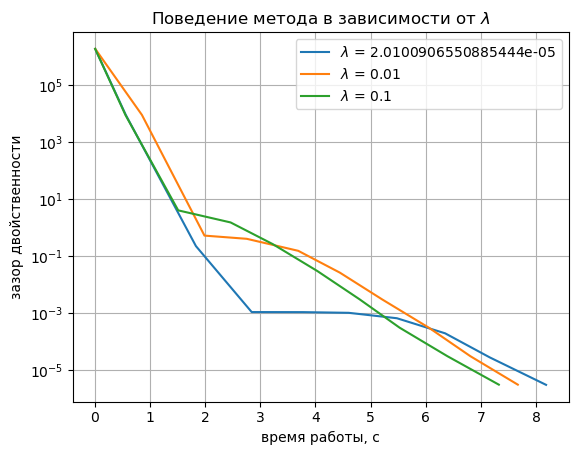

In [12]:
lambda_dependence(lambdas, mode='time')
plt.show()

In [13]:
def nm_dependence(mode='n_iter'):
    np.random.seed(10)
    nms = [(1000, 100), (1000, 1000), (5000, 100)]
    for m, n in nms:
        X = np.random.uniform(0,1,(m, n))
        y = np.random.choice([-1,1], m)
        x_0 = np.random.uniform(0,1,n)
        u_0 = np.ones(n)
        trace = barrier_method_lasso(X, y, 0.01, x_0, u_0, lasso_duality_gap=lasso_duality_gap, trace=True)
        gap = trace[2]['duality_gap']
        x = list(range(len(gap))) if mode=='n_iter' else trace[2]['time']
        plt.semilogy(x, gap, label=f'n = {n}, m = {m}')
    title = 'Поведение метода в зависимости от $n, m$'
    plt.ylabel('зазор двойственности')
    plt.xlabel('число итераций' if mode == 'n_iter' else 'время работы, c')
    plt.title(title)
    plt.grid()
    plt.legend()

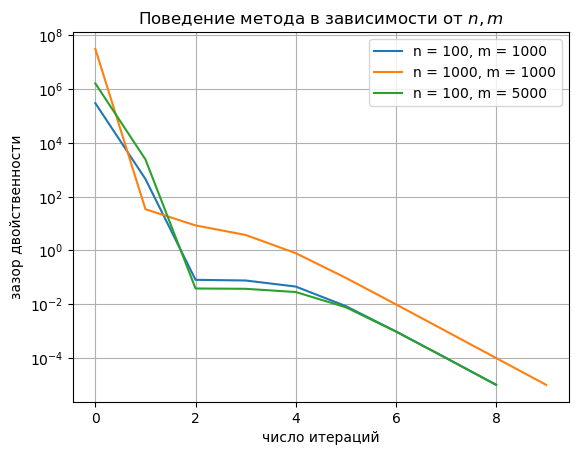

In [14]:
nm_dependence(mode='n_iter')
plt.show()

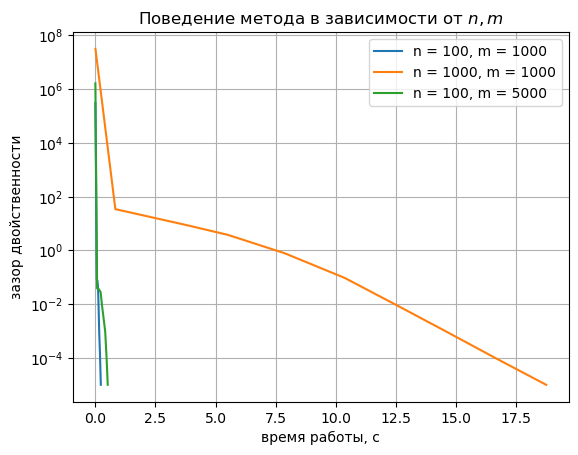

In [15]:
nm_dependence(mode='time')
plt.show()